In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve


<div style="background-color: #F6BDD1; color:white; padding: 10px;">
    <h1>Bayésien naïf gaussien</h1>
</div>

<div style="background-color: #C7F3A5; padding: 10px;">
    <h>Nous allons étudier ici sur la base d’un exemple le <b> classifieur Bayésien naïf </b>.
    Nous utilisons un jeu de données contenant deux coordonnées  $X = (X^1,X^2)$ et nous allons essayer de prédire la classe <i>1</i> ou <i>2</i>, codée par la variable $Y$.
   <br>     
Le modèle que nous allons utiliser est le modèle <b>Bayésien naïf gaussien</b>.

Le modèle probabiliste pour un classifieur Bayésien est le modèle conditionnel :
$$ \mathbb{P}(Y | X)$$

Due à la complexité des distributions conditionnelles nous ne cherchons pas à estimer directement la distribution complète de $Y$ sachant $X$ mais plutôt celle de $X$ sachant $Y$.

### Hypothèses du modèle 
Ce modèle suppose que les deux caractéristiques $X^1$ et $X^2$ sont **indépendantes** entre elles. Il suppose également que les valeurs des caractéristiques pour chaque classe suivent une **distribution normale**:

$$ \mathcal{L} (X^{j} | Y=k) = \mathcal{N} (\mu_{j,k} , \sigma^2_{j,k})$$
avec $k,j \in \{1,2 \}$</h>
</div>

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

<div style="background-color: #C7F3A5; padding: 10px;">
    <h>
        Here, we will study the <b>Naïve Bayes classifier</b> using an example.  
        We use a dataset containing two coordinates, $X = (X^1, X^2)$, and we aim to predict the class <i>1</i> or <i>2</i>, encoded by the variable $Y$.  
        <br>     
        The model we will use is the <b>Gaussian Naïve Bayes</b> model.  

The probabilistic model for a Bayesian classifier follows the conditional model:  
        $$ \mathbb{P}(Y | X)$$  

Due to the complexity of conditional distributions, we do not attempt to estimate the complete distribution of $Y$ given $X$ directly, but rather the distribution of $X$ given $Y$.  

<h3>Model Assumptions</h3>  

This model assumes that the two features, $X^1$ and $X^2$, are **independent** of each other. It also assumes that the feature values for each class follow a **normal distribution**:  

$$ \mathcal{L} (X^{j} | Y=k) = \mathcal{N} (\mu_{j,k} , \sigma^2_{j,k})$$  
        where $k,j \in \{1,2 \}$
    </h>
</div>


### Estimation des paramètres du modèle
Dans ce modèle les paramètres que nous cherchons à estimer sont les moyennes $\mu$ et les variances $\sigma^2$ de nos caracteristiques $X^1$ et $X^2$ pour chaque classe *1* et *2*.

Pour cela nous utilisons les estimateurs du maximum de vraisemblance donnés ci-dessous.
- **la moyenne $\mu_{j,k}$** pour la classe $k$ et la caractéristique $j$:
$$ \hat \mu_{j,k} = \frac{1}{N_k} \sum_{i=1}^{N_k} x_{j,i} $$

- **la variance** $\sigma^2_{j,k}$ pour la classe $k$ et la caractéristique $j$:

$$\hat \sigma^2_{j,k} = \frac{1}{N_k -1} \sum_{i=1}^{N_k} (x_{j,i} - \mu_{j,k}) $$

où $N_k$ est le nombre d'exemples dans la classe $k$ et $x_{j,i}$ est la valeur de la caractéristique $j$ pour l'exemple $i$ de la classe $k$.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

In this model, the parameters we seek to estimate are the means $\mu$ and variances $\sigma^2$ of our features $X^1$ and $X^2$ for each class *1* and *2*.  

To achieve this, we use the maximum likelihood estimators given below:  
        
- **Mean** $\mu_{j,k}$ for class $k$ and feature $j$:  
        $$ \hat \mu_{j,k} = \frac{1}{N_k} \sum_{i=1}^{N_k} x_{j,i} $$  

- **Variance** $\sigma^2_{j,k}$ for class $k$ and feature $j$:  
        $$\hat \sigma^2_{j,k} = \frac{1}{N_k -1} \sum_{i=1}^{N_k} (x_{j,i} - \mu_{j,k}) $$  

where $N_k$ is the number of examples in class $k$ and $x_{j,i}$ is the value of feature $j$ for example $i$ in class $k$.
    </h>

### Classification

Une fois que nous avons calculer les paramètres de notre modèle il manque pour fabriquer un classifieur à proprement parler une **règle de décision** qui puisse les exploiter. 

La règle la plus simple consiste à évaluer la probabilité de chaque classe compte tenu des caractéristiques et de choisir celle qui maximise l’expression suivante:

$$ \mathbb{P}[Y=k] \prod_{j=1} \mathbb{P}[X = x_j| Y=k]$$

Supposons que nous ayons deux tables $X$ (les caractéristiques) et $y$ (la target), les étapes à suivre pour construir notre classificateur sont les suivantes:


1. **Séparation des données** \
Diviser les données en un ensemble d'apprentissage et un ensemble de test: *X_train, y_train* et *X_test, y_test*. 
<br> <br/>
2. **Estimations des paramètres** \
Calculer les moyennes $\mu_{j,k}$ et les variances $\sigma^2_{j,k}$ pour chaque caractéristique $j$ dans chaque classe $k$ de l'ensemble d'apprentissage.
<br><br/>
3. **Estimations des probabilités a priori** \
Calculer $\mathbb{P}[Y=k]$ des classes en utilisant la fréquence relative des classes dans l'ensemble d'apprentissage. 
<br><br/>
4. **Prédiction** \
Pour chaque instance de l'ensemble de test :
      - Calculer les probabilités conditionnelles pour chaque classe en utilisant la distribution normale pour chaque caractéristique. 
      $$\mathbb{P}[X =x_{j}|Y=k] = \frac{1}{\sqrt{2\pi\sigma^2_{j,k}}} \exp \bigg( -\frac{1}{2\sigma^2_{j,k}} (x_{j}-\mu_{j,k})^2 \bigg) $$
      - Appliquez le théorème de Bayes pour calculer la probabilité a posteriori de chaque classe, en utilisant les probabilités a priori.
      $$\mathbb{P}[Y=k,X] = \frac{\mathbb{P}[X|Y=k] \cdot \mathbb{P}[Y=k]}{\mathbb{P}[X]}$$
      où $\mathbb{P}[X]$ est une constante de normalisation.
      - Choisir la classe avec la plus grande probabilité a posteriori comme prédiction.
<br><br/>
5. **Évaluation du Modèle** \
Comparer les prédictions avec les étiquettes réelles de l'ensemble de test et calculer la performance (la précision, le taux d'erreur etc.)

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">


Once we have calculated the parameters of our model, we still need a **decision rule** to properly build a classifier that utilizes them.  

The simplest rule involves evaluating the probability of each class given the features and choosing the class that maximizes the following expression:  

$$ \mathbb{P}[Y=k] \prod_{j=1} \mathbb{P}[X = x_j| Y=k]$$  

Suppose we have two tables, $X$ (features) and $y$ (target), the steps to build our classifier are as follows:  

1. **Data Splitting** \
Divide the dataset into a training set and a test set: *X_train, y_train* and *X_test, y_test*.  
        <br><br/>

2. **Parameter Estimation** \
Compute the means $\mu_{j,k}$ and variances $\sigma^2_{j,k}$ for each feature $j$ in each class $k$ from the training set.  
        <br><br/>

3. **Prior Probability Estimation** \ 
        Compute $\mathbb{P}[Y=k]$ for each class using the relative frequency of the classes in the training set.  
        <br><br/>

4. **Prediction** \
For each instance in the test set: 
      - Compute the conditional probabilities for each class using the normal distribution for each feature: 
      $$\mathbb{P}[X =x_{j}|Y=k] = \frac{1}{\sqrt{2\pi\sigma^2_{j,k}}} \exp \bigg( -\frac{1}{2\sigma^2_{j,k}} (x_{j}-\mu_{j,k})^2 \bigg) $$
      - Apply Bayes' theorem to compute the posterior probability of each class using the prior probabilities:
      $$\mathbb{P}[Y=k,X] = \frac{\mathbb{P}[X|Y=k] \cdot \mathbb{P}[Y=k]}{\mathbb{P}[X]}$$
      where $\mathbb{P}[X]$ is a normalization constant.
      - Choose the class with the highest posterior probability as the prediction.
<br><br/>
5. **Model Evaluation** \
 Compare the predictions with the actual labels in the test set and calculate the performance (accuracy, error rate, etc.).

# Exemple d'application

In [3]:
# importation des données
train_synth = pd.read_csv("Datasets/synth_train.txt", delimiter = "\t")
test_synth = pd.read_csv("Datasets/synth_test.txt", delimiter = "\t")

# séparation des donnés
X_train_synth, y_train_synth = train_synth[["x1","x2"]], train_synth[["y"]]
X_test_synth, y_test_synth = test_synth[["x1","x2"]], test_synth[["y"]]

In [4]:
# 1d array format
y_train_synth = y_train_synth.values.ravel()
y_test_synth = y_test_synth.values.ravel()

Testons le modèle **Bayésien naïf**.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

Let's test the **Naive Bayes** model.

In [5]:
# modèle Bayésien 
GNB_model = GaussianNB()

# entraînement du modèle
GNB_model.fit(X_train_synth, y_train_synth)

# prédictions
y_train_synth_pred = GNB_model.predict(X_train_synth)
y_test_synth_pred = GNB_model.predict(X_test_synth)

# taux d'erreurs
train_error = 1 - accuracy_score(y_train_synth, y_train_synth_pred)
test_error = 1 - accuracy_score(y_test_synth, y_test_synth_pred)

print(f"Taux d'erreur d'apprentissage : {train_error * 100:.0f}%")
print(f"Taux d'erreur de test : {test_error * 100:.0f}%")

Taux d'erreur d'apprentissage : 4%
Taux d'erreur de test : 5%


Nous obtenons en résultat les taux d'erreur d'apprentissage et de test relativement faibles. Ceci indique une bonne performance du modèle. 

Etant donné que le taux d'erreur de test est proche du taux d'erreur d'apprentissage on peut dire que notre modèle ne présente pas de signes de surajustement.

Cependant, il peut être intéressant de tracer la courbe d'apprentissage et celle de la validation croisée pour évaluer le modèle.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

We obtain relatively low training and test error rates as a result. This indicates good model performance.

Since the test error rate is close to the training error rate, we can say that our model does not show signs of overfitting.

However, it may be interesting to plot the learning curve and the cross-validation curve to further evaluate the model.

In [6]:
# validation croisée
cv_scores = cross_val_score(GNB_model, X_train_synth, y_train_synth, scoring="accuracy")
print(f"Précision moyenne de la validation croisée : {np.mean(cv_scores) * 100:.0f}%")


Précision moyenne de la validation croisée : 95%


Ce résultat indique que le modèle arrive bien à généraliser aux nouvelles données.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

This result indicates that the model is able to generalize well to new data.

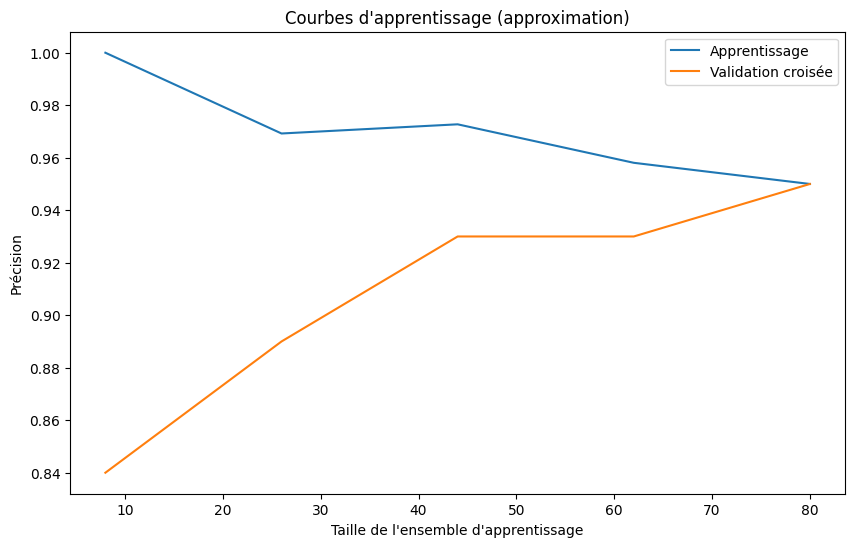

In [7]:
# courbes d'apprentissage (approximation)
train_sizes, train_scores, test_scores = learning_curve(GNB_model, X_train_synth, y_train_synth, 
                                                        scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Apprentissage")
plt.plot(train_sizes, test_scores_mean, label="Validation croisée")
plt.xlabel("Taille de l'ensemble d'apprentissage")
plt.ylabel("Précision")
plt.title("Courbes d'apprentissage (approximation)")
plt.legend()
plt.show()

Les deux courbes se croisent au point 0.95, ce qui indique que le modèle atteint un équilibre entre la complexité et la généralisation. Le modèle est capable de bien ajuster les données tout en maintenant une bonne capacité de généralisation.

Ce qui peut également être intéressant c'est de comparer les résultats de ce modèle avec un autre modèle de machine learning.
<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
 
 The two curves intersect at point 0.95, indicating that the model achieves a balance between complexity and generalization. The model is able to fit the data well while maintaining good generalization capability.

It may also be interesting to compare the results of this model with another machine learning model.

Ajustons cette fois ci nos données avec un modèle de **forêt aléatoire**. 

Faisons d'abord une recherche automatique des meilleurs hyperparamètres

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

Let's adjust our data this time using a **random forest model**.

First, let's perform an automatic search for the best hyperparameters.

In [8]:
# les hyperparamètres à ajuster
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# modèle de forêt aléatoire
RF_model = RandomForestClassifier(random_state=42)

# recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, scoring="accuracy")
grid_search.fit(X_train_synth, y_train_synth)

print("Meilleurs hyperparamètres:", grid_search.best_params_)


Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [9]:
# le meilleur modèle
RF_model_best = grid_search.best_estimator_

# prédictions 
y_train_pred_rf = RF_model_best.predict(X_train_synth)
y_test_pred_rf = RF_model_best.predict(X_test_synth)

# taux d'erreurs
train_error_rf = 1 - accuracy_score(y_train_synth, y_train_pred_rf)
test_error_rf = 1 - accuracy_score(y_test_synth, y_test_pred_rf)

print(f"Taux d'erreur d'apprentissage : {train_error_rf * 100:.0f}%")
print(f"Taux d'erreur de test : {test_error_rf * 100:.0f}%")


Taux d'erreur d'apprentissage : 1%
Taux d'erreur de test : 5%


Nous obtenons de nouveau de très bons résultats. Le modèle réussit à classer correctement 99% des exemples d'apprentissage. Le taux d'erreur d'apprentissage est plus petit que celui du modèle Bayésien, le taux d'erreur de test est le même pour les deux modèles.

Examinons la précision moyenne de la validation croisée et traçons les mêmes courbes que précédemment.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

We once again obtain very good results. The model successfully classifies 99% of the training examples. The training error rate is lower than that of the Bayesian model, while the test error rate remains the same for both models.

Let's examine the average accuracy of cross-validation and plot the same curves as before.

In [10]:
# validation croisée
cv_scores = cross_val_score(RF_model_best, X_train_synth, y_train_synth, scoring="accuracy")
print(f"Précision moyenne de la validation croisée : {np.mean(cv_scores) * 100:.0f}%")


Précision moyenne de la validation croisée : 93%


Elle est inférieure à celle de la méthode Bayésienne.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

It is lower than that of the Bayesian method.

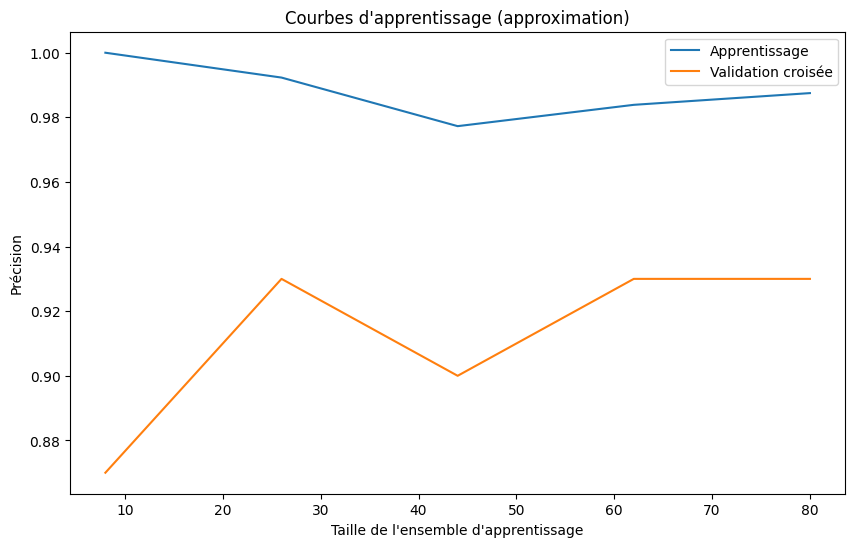

In [11]:
# courbes d'apprentissage (approximation)
train_sizes, train_scores, test_scores = learning_curve(RF_model_best, X_train_synth, y_train_synth, 
                                                        scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Apprentissage")
plt.plot(train_sizes, test_scores_mean, label="Validation croisée")
plt.xlabel("Taille de l'ensemble d'apprentissage")
plt.ylabel("Précision")
plt.title("Courbes d'apprentissage (approximation)")
plt.legend()
plt.show()

Ce modèle ne semble pas souffrir d'un surajustement excessif. 
Néanmoins, les deux courbes sont moins monotones que celles de la méthodes Bayésienne. Même si l'écart entre les performances d'apprentissage et de validation croisée est relativement faible, les deux courbes ne convergent pas vers la même précision.

La méthode bayésienne semble plus stable, atteignant une performance élevée et se stabilisant rapidement, suggérant une simplicité dans la capacité de généralisation.

Les forêts aléatoires semblent plus complexes avec des courbes qui continuent de descendre ou monter, indiquant un potentiel de surajustement ou une complexité accrue.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

This model does not appear to suffer from excessive overfitting.
However, the two curves are less monotonic than those of the Bayesian method. Even though the gap between training and cross-validation performance is relatively small, the two curves do not converge to the same accuracy.

The Bayesian method seems more stable, reaching high performance and stabilizing quickly, suggesting simplicity in its generalization ability.

Random forests appear more complex, with curves that continue to rise or fall, indicating a potential for overfitting or increased complexity.